#Redes generativas antagonicas
Las Redes Generativas Antagónicas, o Generative Adversarial Networks en inglés (GAN), son una clase de redes neuronales. De hecho, se podría decir que se han convertido en uno de los pilares del reciente «boom» de la llamada Inteligencia Artificial. Fueron presentadas por Ian Goodfellow et al. en 2014 y desde entonces han permitido un gran avance en el campo del aprendizaje máquina no supervisado.

Las GAN son una de las herramientas más interesantes de la IA, pero su implementación requiere un cierto dominio, especialmente en métodos numéricos y consisten esencialmente en un algoritmo basado en un sistema de dos redes neuronales -el Generador y el Discriminador– que compiten entre sí.

![title](https://i0.wp.com/puentesdigitales.com/wp-content/uploads/2019/02/discriminator.png?resize=926%2C361&ssl=1)

Dada una serie de muestras objetivo, el Generador intenta producir muestras que puedan engañar al Discriminador para que éste crea que son reales. El Discriminador intenta resolver muestras reales (objetivo) a partir de muestras falsas (generadas). Usando este enfoque de entrenamiento o competición iterativa, eventualmente terminamos con un Generador que es realmente bueno generando muestras similares a las muestras reales y por lo tanto es capaz de engañar al Discriminador. El Generador ha conseguido realizar una creación artificial (un texto, una imagen, un vídeo, un audio…) que es extremadamente similar al que pudiese ser el real. No es una copia, porque se ha creado algo nuevo, el Generador ha creado algo imitando un «estilo» real.

Las GAN tienen una gran cantidad de aplicaciones, ya que pueden aprender a imitar distribuciones de datos de casi cualquier tipo. Gracias a este tipo de redes podemos ver desarrollos recientes realmente espectaculares, como por ejemplo estos:

* [Las caras falsas imaginadas por una nueva IA son cada vez más reales](https://www.technologyreview.es/s/10818/las-caras-falsas-imaginadas-por-una-nueva-ia-son-cada-vez-mas-reales)
    
* [Una inteligencia artificial para crear gatos](https://futurism.com/cat-doesnt-exist-ai)

* [La IA de Nvidia que convierte garabatos ene paisajes hiperrealistas](https://www.theverge.com/2019/3/19/18272602/ai-art-generation-gan-nvidia-doodle-landscapes)

#Algoritmos generativos contra discriminatorios

Para entender las GAN, hay que saber cómo funcionan los algoritmos generativos y, para ello, es útil contrastarlos con los llamados algoritmos discriminatorios. Los algoritmos discriminatorios tratan de clasificar los datos de entrada. Es decir, dadas unas características de unos datos, predicen una etiqueta o categoría a la que pertenecen esos datos.

Por ejemplo, dadas todas las palabras de un correo electrónico un algoritmo discriminatorio podría predecir si el mensaje es «spam» o «no_spam». Spam es una de las etiquetas, y la «bolsa de palabras» recopiladas del correo electrónico son las características que constituyen los datos de entrada.

Así que los algoritmos discriminatorios asignan características a las etiquetas. Se refieren únicamente a esa correlación. Una forma de pensar en los algoritmos generativos es que hacen precisamente lo contrario; en lugar de predecir una etiqueta con ciertas características, intentan predecir características con una etiqueta determinada.

Por eso la pregunta que un algoritmo generativo intenta responder es:

¿Asumiendo que este correo electrónico es spam, ¿Qué tan probable es que se cumplan estas características?

Una buena manera de entender las GAN es verlas funcionando visualmente. En la siguiente web pueden cambiar varios parámetros y ver cómo las distribuciones de datos van tomando forma en el proceso de aprendizaje:

[GAN lab](https://poloclub.github.io/ganlab/)

In [1]:
import tensorflow as tf
import IPython.display as display
 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False
 
import numpy as np
import PIL.Image
import time
import functools

In [2]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cambiando estas direcciones pueden cambiar las imagenes utilizadas para hacer la transferencia de estilos.

In [4]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [5]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [25]:
content_path = '/content/drive/MyDrive/Taller 2022 IA/Imagenes/Gallo_con_tennis.png'
style_path = '/content/drive/MyDrive/Taller 2022 IA/Imagenes/Gogh.jpg'
print(content_path)

/content/drive/MyDrive/Taller 2022 IA/Imagenes/Gallo_con_tennis.png


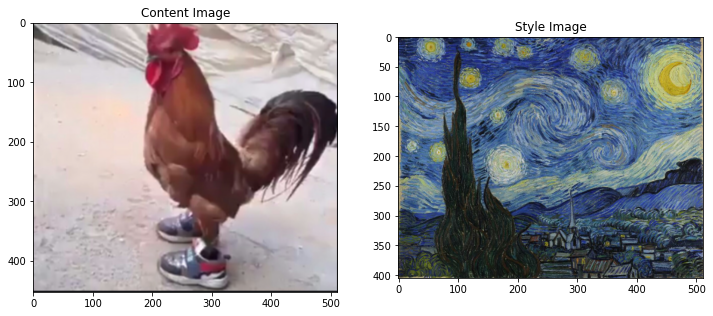

In [26]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

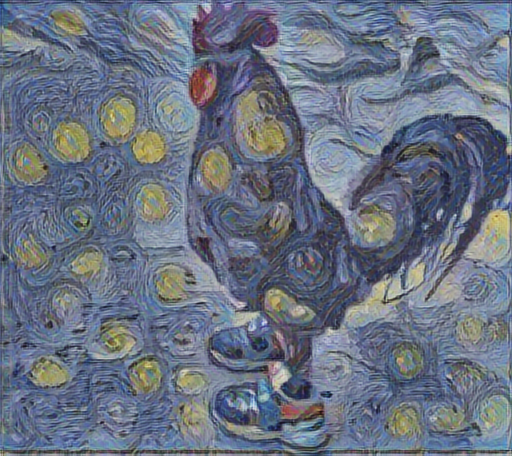

In [27]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)
